In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [4]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv('kerala.csv')

In [ ]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
data['FLOODS'] = data['FLOODS'].apply(lambda x: x.strip())

In [ ]:
data['FLOODS'] = data['FLOODS'].apply(lambda x:0 if x == "NO" else 1 if x == "YES" else 2)

In [ ]:
data = data.drop(columns = ['SUBDIVISION'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 14.0 KB


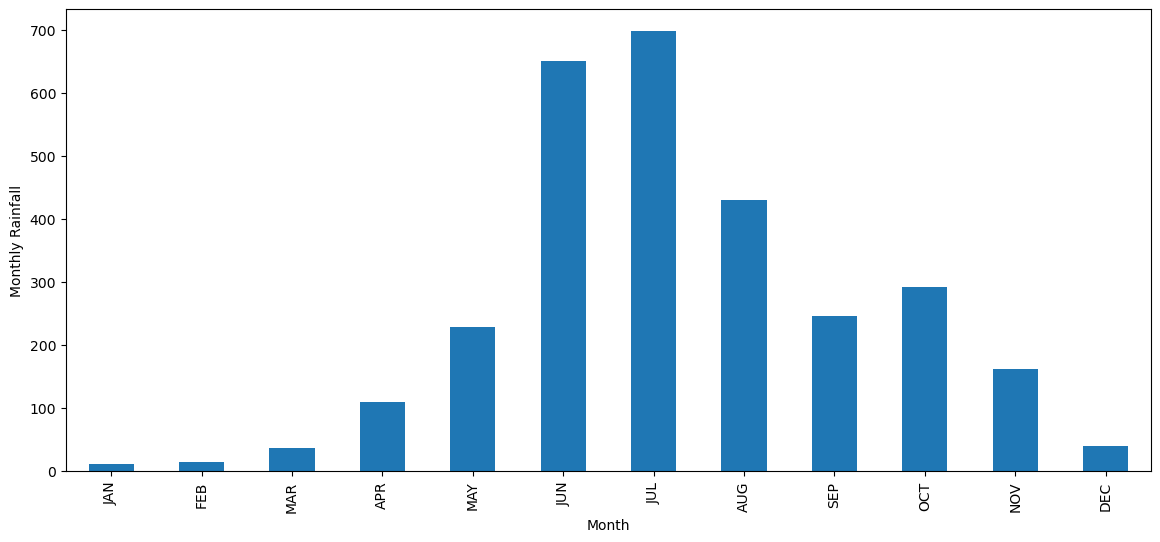

In [ ]:
# Creating a bar plot of the average (mean) monthly rainfall for each month

mx = data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot.bar(figsize=(14,6))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.show()

In [ ]:
data["FLOODS"].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

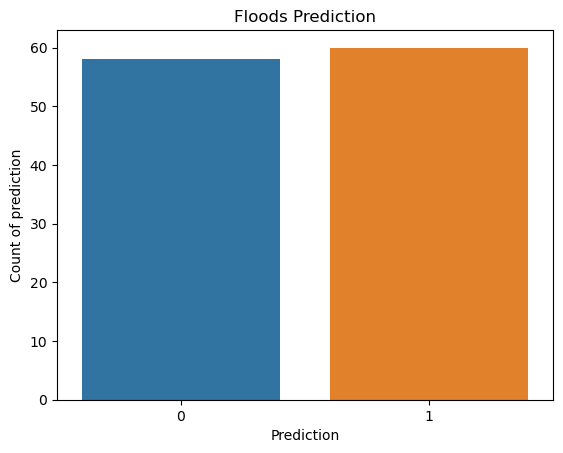

In [ ]:
sns.countplot(x="FLOODS",data = data)
plt.xlabel("Prediction")
plt.ylabel("Count of prediction")
plt.title("Floods Prediction")
plt.show

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(118, 14)
(118,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 98)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features=None,
                                   subsample=1.0,
                                   random_state=42)

model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([-1.27016779e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.82259509e-18,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00])

In [ ]:
data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

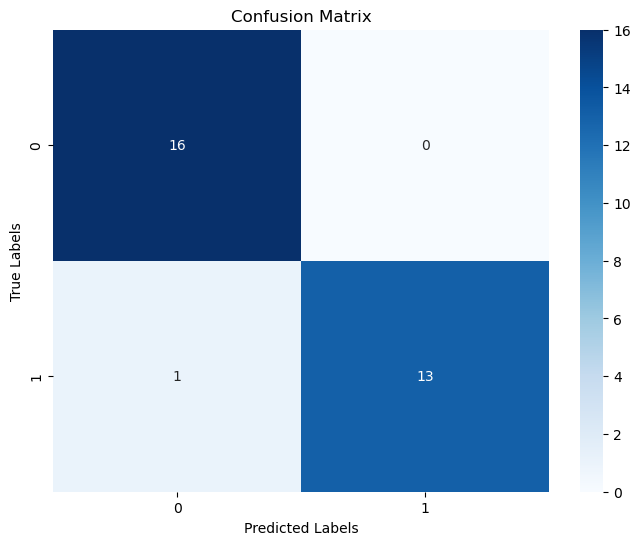

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy Score : {accuracy}")
print('---------------------------')
print(classification_report(y_pred,y_test))

Accuracy Score : 0.9666666666666667
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.03333333333333333